## The Machine Learning Workflow

Let's say we want to figure out whether or not a new learner will complete a specific course.  We are confident that the course has a good balance that allows a learner to understand any concept by applying it. Unfortunately, that doesn't always imply that everyone will complete a course.

So, how could we predict that a new learner will complete the course?

Let's say we've collected data for every current learner on the website. We know:

- How many lessons they've completed previously on the website.
- How many of the other courses they've completed.
- How many exercises they've successfully passed.
- How many hours they've spent on each individual lesson.
- Whether they've already completed the course.

Based on the data, we already know whether an existing learner has completed the course. Are there relevant details in the rest of the data that could help us find a pattern that relates a learner's actions on the website to the likelihood of their completing the course?

Maybe, upon exploring the data, we find that 90% of learners who completed the course:

- Completed more than L lessons previously.
- Spent more than H hours, on average, per lesson.
- Passed more than E exercises.

Given these patterns, can we say that a new learner who satisfies the above criteria will complete that course also?

Well, we can't guarantee it. But, the likelihood of that happening might be high if the new learner satisfies the above rules. What if we learn something new from the data that changes that likelihood? It could get lower or higher.

We can't always identify these patterns one at a time, especially when we have lots of data. This is exactly where `machine learning` can help.

Instead of making decisions based on patterns identified from information we already have, we can use machine learning to do it for us.

The small set of rules or criteria we identified above is essentially what a machine learning model does without us explicitly programming those rules. We train the model so it learns to identify those patterns from the data on its own. We then use the model to predict something given a new, unseen, input. That "something" might seem a bit ambiguous, but what we want to predict depends on the intended outcome or task. In this and the next few courses, we will cover such tasks and learn machine learning models that can help us with those tasks.

What we learned above gives us a quick introduction to the machine learning workflow:

- Data Collection.
- Data Exploration and Wrangling.
- Data Preparation (Feature Engineering).
- Building and training a model.
- Evaluating the model performance.
- Fine-tuning the model.
- Evaluating the model performance.

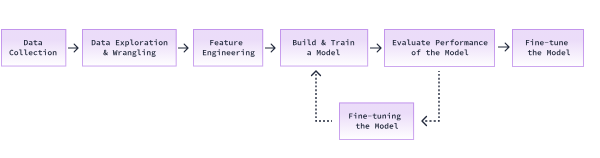

That might seem like a lot of steps and terminology! Some things might not be explicitly clear right away, but don't worry. Throughout this course, we will go through each step of the above workflow in more detail.

For the rest of this lesson, we will use a popular, python-based machine learning library called [scikit-learn](https://scikit-learn.org/) and learn more about this workflow. We'll also train a simple machine learning model to predict if a patient has breast cancer.

Please note that this lesson will focus on helping us familiarize with the workflow. Any concepts or terminology that might come across as confusing or challenging will be covered in varying depths across the remaining lessons and courses.

## Data Collection and Exploration

On the previous screen, we learned what machine learning is and about the machine learning workflow. Let's put what we learned into action!

We'll build a model that predicts whether a patient has breast cancer. We'll start with the data.

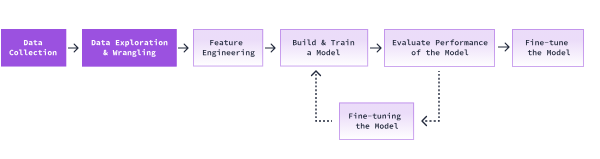

While it's possible, it's not always feasible to collect our own data. Fortunately, there are a lot of publicly available datasets that we can freely access and work with, depending on what kind of problem we want to solve.

We'll work with the [Breast Cancer Wisconsin (Diagnostic) Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The scikit-learn library stores several datasets, including this [breast cancer dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset), and makes it convenient for us to load and work with them.

On the first screen, we looked at what kind of data could be collected 

- How many lessons students have completed on the website.
- How many courses they've completed so far.
- How many exercises they've successfully passed.
- How many hours they've spent on each lesson.

Each of the above is called a feature. They all describe or are a property of our data. When we work with tabular data, each column name corresponds to a feature -- except one:

- Whether or not a learner has already completed the course.

The column corresponding to the above is called the `target variable` because that's what we want our model to predict. That's our target.

Every row for the above would contain information related to an individual learner. Each of these rows is called an observation or a feature vector. It's an n-dimensional vector of features.

Let's look at the dataset we'll be working with. The link to our dataset provides us with the following information

- There are a total of 30 attributes, or 30 features.
- There are a total of 569 instances or observations.
- There are two classes in the target variable:
    - WDBC-Malignant
    - WDBC-Benign

The above two classes, or labels, tell us whether a patient has a benign or a malignant tumor. For every observation, there's a corresponding class or label in our data.

Let's load in our dataset using scikit-learn's [load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) function. The function will return an object with several attributes, a couple of which we will utilize:

- data stores the data points.
- target stores the value 0 if the tumor is benign or 1 if the tumor is malignant.

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
cancer_data = load_breast_cancer(as_frame=True)
cancer_df = cancer_data['data']
target = cancer_data['target']

cancer_df['target'] = target

In [3]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [5]:
cancer_df.shape

(569, 31)

In [6]:
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
cancer_df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [8]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Supervised Machine Learning: Classification

On the previous screen, we identified that our data has no missing values. We can, for now, work with the assumption that our data is clean and doesn't require further wrangling. That's always a dangerous assumption to make, but, for this lesson, our focus is on exploring the machine learning workflow from a broader perspective.

Our next step is to prepare our data before we input it to our model. However, we haven't really discussed what this model is.

Let's say we don't know what a giraffe looks like. Someone shows us a photo of a giraffe and we are able to identify some features that we think are unique to a giraffe. The next time we see a photo of a giraffe, even if it's a completely different one than before, we are highly likely to know that it's a giraffe. Our innate pattern-matching abilities could fail us, and we might confuse it for an ostrich just because of the long neck. But that's unlikely.

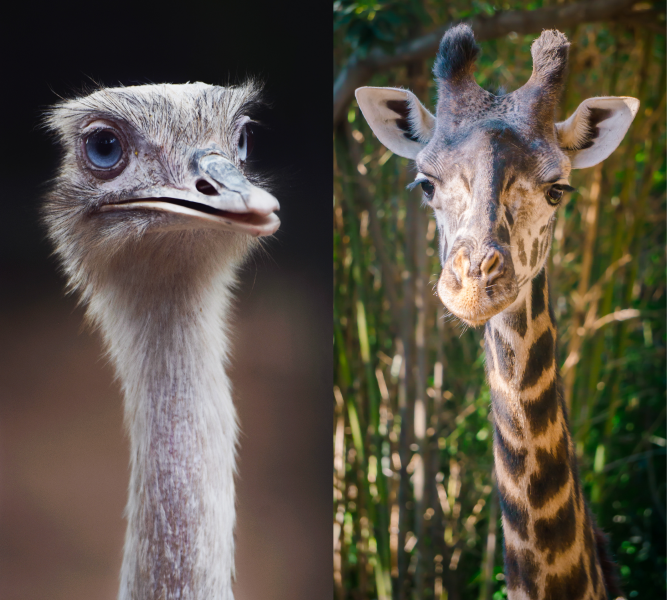

We were supplied with a label, along with a set of features, and our brains learned to associate that label with those features. The next time we saw a similar set of features, we were able to predict the correct label. That's the intuition behind the subset of machine learning we'll learn about in this course--supervised machine learning.

It's supervised because our model learns from existing data and the corresponding labels. There are usually two types of labels that we encounter:

- Continuous labels.
    - For example, we could be working with a dataset that contains features that describe different types of cars, and the labels could be the price of those cars. Our model would then learn to predict the price of a car, given those features as input.

- Categorical labels.
    - Our breast cancer dataset has only two labels--benign and malignant, or 0 and 1. Each observation is categorized by its own label or class.

If the label or target we want to predict is a categorical value, we call it a classification task. The model, a classifier, will try to classify a given set of inputs into a category. There are other types of machine learning models that can be used for different kinds of tasks. We'll learn about those later.

So, what exactly does the model learn from the data?

This is dependent on the machine learning algorithm we end up using for our model. Throughout this course, we will cover several algorithms that will answer that question for us. But, intuitively, think of our dataset as a bunch of points on a chart:

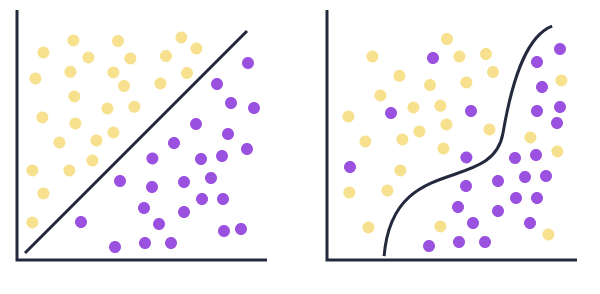

The points on the charts above are our features in a two-dimensional space. This space is called a feature space and the colors represent the labels. The line that we see is a decision boundary and it divides the feature space into two. Points on one side of the boundary belong to one class, and points on the other side of the boundary belong to the other class.

That decision boundary is our classifier. Since we only have two labels, it's called a binary classifier. If we had more labels, it would be a multi-class classifier.

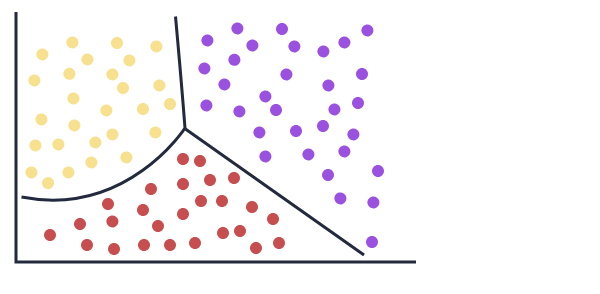

If we had more features, we would have an n-dimensional space and the decision boundary would be a hyperplane instead of a line.

But where does that line come from?

We know that a line or a curve can be defined using a parametric equation. That's what the model tries to learn - the parameters of that equation. The model estimates those parameters from the data, and those estimated parameters define the decision boundary.

Now that we have a better idea of what kind of machine learning task we're carrying out, let's prepare our data so that we can then train a model on it.

## Data Preparation

In the previous screens, we came across a couple of concepts:

- Training a model on our data.
- Using the model to make a prediction on unseen data.

The data that we use to train our model is called training data, a training set or a training dataset.

The unseen data, as the name suggests, is data that our model hasn't seen before. The model has not trained on that data and will only use that data and predict a label for it.

This unseen data is called test data, a test set or a test dataset. It's used to evaluate the model's performance. Since we don't have any additional data to use as a test set, we can randomly select a small set of observations from our original dataset and set it aside. That way, we can train our model on the rest of the dataset and test it later using the test set.

Next we'll prepare our training and test datasets using scikit-learn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function. There will be two stages to this process:

1. The function expects the feature columns and the target column as inputs. If we look at the examples in the documentation, those two are passed to the function as X and y. As we work with the library more, we'll notice this convention often--the input data is usually stored in X and the target variable is stored in y. We'll follow the same convention here.
2.  The function will split the dataset into a training set and a test set based on a proportion that we decide. Usually, the test set's size is about 15 to 20 percent of the dataset's. Different factors, such as the original dataset's size, can also play a part in deciding that percentage.
    - The function splits the data randomly into each set. We'll learn why that's relevant in a future lesson.
    - The output of train_test_split() is a list containing 4 elements:
        - The training set features.
        - The test set features.
        - The training set labels.
        - The test set labels.

Note that there can be, and usually are, multiple steps as part of preparing the data. For example, we might have to clean our data before we train a model on it. We'll cover this topic in more detail in a later lesson.

In [10]:
from sklearn.model_selection import train_test_split
X = cancer_df.drop('target', axis=1)
y = cancer_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=417)

## Building and Training a Classifier

We have our training data ready! We can now train a model.

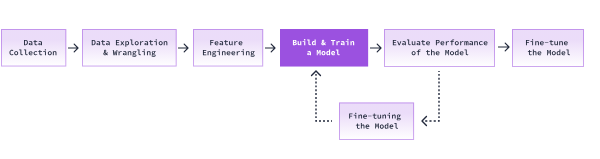

scikit-learn offers [many machine learning models](https://scikit-learn.org/stable/supervised_learning.html). We can pick any one of the classification models and use it out of the box.

That's exactly what we'll do. We'll use the [Linear Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) model. We can check the documentation to see what kind of input parameters it can take. scikit-learn makes it easy for us to use the model without needing to understand the minute details of the algorithm. We'll observe this soon.

There are only two steps for building and training the model:

1. We first instantiate the model. This is similar to how we would instantiate a Python class.
    - This step doesn't take any training data as input. We can, however, define and set the values for the parameters we saw in the documentation linked above.
2. We fit the model onto the training data features (X) and labels (y). Fitting the model is the same as training our model.

In [11]:
from sklearn.svm import LinearSVC

model = LinearSVC(penalty='l2', loss='squared_hinge', C=10, random_state=417, dual='auto')
model.fit(X_train, y_train)

LinearSVC(C=10, dual='auto', random_state=417)

## Evaluating the Model on Test Set I

We have successfully trained our model! But we don't know how well it performs.

How can we measure the performance of a model?

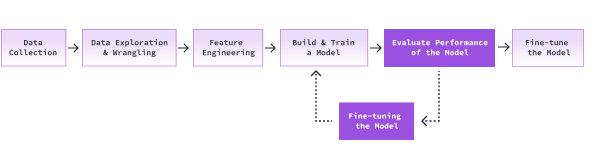

One of the most common ways to evaluate a classifier is to look at how accurate its predictions are. For a supervised learning task, we already know which class a particular observation belongs to.

We can use our model to predict the labels of our test data. We can then calculate the accuracy of our model by comparing those predictions to the actual labels. But we don't need to do that all by ourselves.

scikit-learn provides a method [score()](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC.score) that can calculate that accuracy.

In [12]:
test_accuracy = model.score(X_test, y_test)

In [13]:
test_accuracy

0.9651162790697675

## Fine-tuning the Model

Our model got an accuracy score of approximately 96.51. That means roughly 96.51% of our predictions were correct.

That's a pretty good result, but building machine learning models is an iterative process. We can try to improve upon our result.

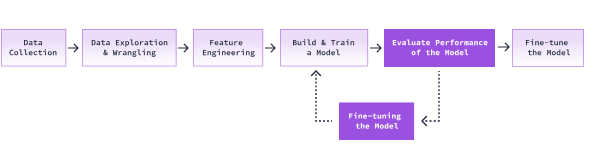

When we instantiated the LinearSVC model, we defined the following parameters:

- penalty="l2"
- loss="squared_hinge"
- C=10

While we don't know what these values imply for our model, we can experiment with them.

In an attempt to improve upon our result, we will:

- Change the values to one of the above parameters.
- Add and set another parameter from the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn-svm-linearsvc).

In [16]:
model = LinearSVC(penalty='l2', loss='squared_hinge', C=20, max_iter=3500, dual='auto', random_state=417)
model.fit(X_train, y_train)

LinearSVC(C=20, dual='auto', max_iter=3500, random_state=417)

## Evaluating the Model on Test Set II


In the last screen, we fine-tuned our model. We don't know yet if that improved our model's performance.

Before we evaluate our model on the test set, let's look at the following plot:

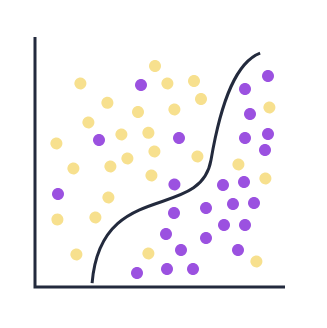

We can notice that there are yellow dots on the left side and there are purple on the right side of the decision boundary. The above is meant to be a simplified representation of how the decision boundary can't always capture the complexity of the data.

What happens when we add a point to the above plot? Will it be correctly classified?

We can't be sure. Our model is not going to be perfect. It's not going to give us a 100% accuracy, even if we keep experimenting with different parameter values.

Let's see how our updated model performs on the test set.

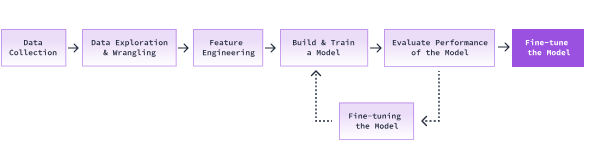

In [17]:
model.score(X_test, y_test)

0.9534883720930233

## Experimentation vs Fundamentals

It's really amazing how we managed to:

- Train a randomly selected model from scikit-learn.
- Experiment with a few of its parameters, and
- Get it to predict, with reasonably high accuracy, whether a patient has breast cancer.

We managed to do that without understanding:

- What the model actually does.
- What the different parameters of that model are for.
- What most of the dataset's features are.

While there is clearly a case to be made for the value of being able to quickly iterate and experiment with different models, we can't lose sight of the bigger picture either.

Remember we set max_iter to 3500? If we'd set it to 3000 instead, our accuracy would have dropped precipitously!

What would we have done in that situation? There are 12 parameters in [scikit-learn's LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn-svm-linearsvc).

-How many of those parameters could we experiment with?
- What possible permutations and combinations of values could we have tried?
- What happens if we lower C instead of increasing it? What does C actually do in the model? Would lowering it make our model perform better on the test set?
- If we were to get more data with some new features, would our selected values yield similar results or would we have to go through the process all over again?
- What if we had millions of observations instead? Could we afford to run any model any number of times on such a large dataset? Which model would even be suitable for such a large dataset?
- What if we kept trying random models with random parameters, but there was an issue with the dataset itself? What if we could've identified whether some of the features were more relevant or vice-versa? Would that have helped us more than trying all those models, or would that have made things worse for us?

Understanding the fundamentals or understanding how a machine learning algorithm works "under the hood" opens up additional insights to rely on when trying to answer some of the questions above. It can allow us to experiment and iterate from an informed perspective.

In the next few lessons, we'll learn from that other perspective. We'll learn about a different machine learning algorithm, implement it from scratch, and then use scikit-learn again.

In this lesson, we learned about:

- Machine learning, supervised machine learning, and classification.
- Machine learning workflow and how to establish one using scikit-learn.
- Prototyping a binary classifier using scikit-learn.
- Limitations of experimentation in machine learning without understanding some of the fundamentals first.